<center><h1>Graph project: Epidemic spreading</h1></center>

<center><h4>ENSEEIHT SN</h4></center>

<h5>PAKHMUTOV Andrei, SOTORIVA LERMEN Thiago, Groupe B2</h5>

<div style="width:75%;margin:0 auto;">
    
## Introduction
<a id='intro'></a>
    
<p style="text-align:justify;"> As you know, a new epidemic has overwhelmed the world, COVID-19 jeopardizes people and changes our habits. It is easy to realise that knowing how illnesses spread is vital to our own protection. How can we predict whether a disease will cause an epidemic, how many people it will infect, which people it will infect, and whether or not it is dangerous to society as a whole ? Also, how can we determine which techniques to use in fighting an epidemic once it begins ? One way to answer all of these questions is through <strong>mathematical modeling</strong>. </p>

<p style="text-align:justify;"> In this work you will have to review different epidemic modelings relying all on the representation by graphs of a human network called a <strong>contact network</strong>. A vertex in a contact network represents an individual and an edge between two vertices represents a contact between two individuals. The disease only spread from individual to individual if they are in contact, so through the edges. This representation is actually really common in research, and a lot of state-of-the-art modeling are built over it. From these different models you will be asked to draw conclusions from experiments on varying contact networks</p>

<p style="text-align:justify;"> For readability and ease of use, this project will be carried on a Jupyter Notebook, hence code and question answering have to be written in this unique file. This is a <strong>DUO</strong> project, no group of one person will be accepted, the duo has to be composed of same TD group students, if the number of students in the TD group is odd we will accept one group composed of three students. It will be coded in Julia using the LightGraphs package. <strong>BEWARE:</strong> 
    
- If the code does not provide good results, its readability as well as its comments are essential for the corrector to potentially find some notation points.
- The specifications of the functions have to be strictly respected.
- Do not neglect written questions they stand for an important part of the notation, you are not only evaluated on the coding. Also, even so a written question may not ask you directly to code or provide results from code, support your arguments when possible with a runable example is very welcome and sometimes even expected.
- Any initiatives and additional efforts bringing contents and thoughts out of the question scope may result in bonus points if pertinent.
</p> 
    
<p style="text-align:justify;"> Deliverable: You will deliver your work on moodle before <strong style="font-size:1.3em">23.01.2022</strong> in a <strong style="font-size:1.3em">.tar</strong> containing the notebook with your codes and your written answers, and the different graph figures in .png you will generate. The corrector will use the student N7 computers for running your code, so take care of verifying that your work is running as expected on these computers !</p>

LightGraphs documentation: https://juliagraphs.org/LightGraphs.jl/v1.2/index.html
    
<!---
http://makie.juliaplots.org/stable/basic-tutorial.html#Adding-plots-to-a-Scene
TODO: afficher l'historique gplot des graphes durant la simu pour voir visuellement ce que ça donne. Peut etre necessiter de locker l'affichage graphique.
afficher pour tau fixer sur different graphe de degré le nombre max d'infecté durant la simu.
    
Faire coder le modèle SAIS et SIR

    Pour SIR faire la courbe dans un des sites dans les favoris
    
    Expliquer en quoi la distance et Jordan ne sont pas tout le temps optimal. Expliquer pourquoi le DMP peut présenter de meilleur résultat.

Demander d'imaginer d'autres modèle inspirer de maladie
--->

<div style="width:75%;margin:0 auto;">

## Environment and packages installation
<a id='env'></a>
    

<p style="text-align:justify;"> <strong>IMPORTANT</strong>: For evaluation, coding questions have to run with no additional packages ! Only the ones present here ! However if you want to use another package to go further in your answer and add bonus contents, take care of separating the cells and precising which packages you are using.</p>

In [1]:
using Pkg
Pkg.activate(".") # Path to Manifest.toml and Project.toml
Pkg.resolve()
Pkg.add("Graphs")

  Activating project at `~/Documents/ENSEEIHT-BigData/graphes/Projet Graphes`
  No Changes to `~/Documents/ENSEEIHT-BigData/graphes/Projet Graphes/Project.toml`
  No Changes to `~/Documents/ENSEEIHT-BigData/graphes/Projet Graphes/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/ENSEEIHT-BigData/graphes/Projet Graphes/Project.toml`
  No Changes to `~/Documents/ENSEEIHT-BigData/graphes/Projet Graphes/Manifest.toml`


In [2]:
# Import packages
using Pkg
Pkg.activate(".") # Path to Manifest.toml and Project.toml
using GraphPlot
using Colors
using CairoMakie
using StatsBase
using Plots
using JLD2
using Compose
using Graphs

  Activating project at `~/Documents/ENSEEIHT-BigData/graphes/Projet Graphes`


<div style="width:75%;margin:0 auto;">

## Part 1 - SIS model
<a id='part1'></a>

<p style="text-align:justify;">SIS is a compartmental model, ie a model where the population is divided into subgroups that represent the disease status of its members. SIS stands for Susceptible $\rightarrow$ Infected $\rightarrow$ Susceptible where the susceptible group contains those who remain susceptible to the infection, and the infected group consists of those who not only have the disease but are also in the contagious period of the disease.</p>
    
<p style="text-align:justify;"> Combine with a contact network approach, this model can capture contact patterns (family, company, friends). Each vertex represents an individual in the host population, and contacts between two individuals are represented by an edge that connects the two. The probability of transmitting the disease from an infected to a susceptible individual along one of these edges or contacts is $\beta$ (=<strong>infection rate</strong>). The probability to cure is $\alpha$ (= <strong>curing rate</strong>). </p>

    
<p style="text-align:justify;">In order for a disease to begin spreading through a network, the disease must be introduced into the population, either through infecting a proportion of the population or through infecting one individual. As time moves forward, the disease will spread away from those initially infected, and two things may occur simultaneously at each time step $t$. First, each infected individual will spread disease to each of its contacts with a probability $\beta$. Secondly, each infectious individual will recover at a rate, $\alpha$ , at which point the individual will then no longer infect any of its contacts. After the disease has run its course, we can determine how the disease affected the network by calculating various quantities that help us better understand the outbreak.
</p>

<br>
    
<p style="font-size:0.9em">P. Van Mieghem, J. Omic, R. E. Kooij, <em>“Virus Spread in Networks”</em>,
IEEE/ACM Transaction on Networking (2009)<p>


<!---
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font size = 4.5px><b>Algorithm 1:</b> Girvan Newman</font><br>
    <div style="margin-left:50px;border-left:2px solid black;padding-left:10px;">
    <b> WHILE </b> there are still edges<b> OR </b> desired nb of communities unreached <b>DO</b>
        <div style="margin-left:50px;border-left:2px solid black;padding-left:10px;">
        Calculate betweeness of all edges <br>
        Remove the edge with the highest betweeness <br>
        Calculate the number of strongly connected components
        </div>
    <b> END WHILE </b>   
    </div>
</div>
--->

<div style="width:75%;margin:0 auto;">

### 1.1 Contact networks sample

In [3]:
"""karat7: A graph representing the karate club of N7 and the connections between the persons in this club.
There are 34 people in this network. It is actually inspired by one of the most famous problem in graph
theory: the Zachary's karate club.
"""
karat7 = smallgraph(:karate)
nodecolor = [colorant"lightseagreen"]
draw(PNG("karat7.png", 100cm, 100cm), gplot(karat7,nodefillc=nodecolor))

In [4]:
"""n7_2A: A graph representing the second year students at N7. Each department (SN, MF2E, 3EA) form a 
community where connections are denser, connections between department are rarer.
"""
c=[[10,0,0] [0.1,10,0] [0.1,0.1,10]]
n=[100,70,50]
n7_2A = stochastic_block_model(c,n)
nodecolor = [colorant"lightseagreen"]
draw(PNG("n7_2A.png", 100cm, 100cm), gplot(n7_2A,nodefillc=nodecolor))

In [5]:
"""toulouse_neigh: A graph representing a neighborhood composed of 1000 people in Toulouse.
"""
toulouse_neigh = barabasi_albert(1000, 1)
nodecolor = [colorant"lightseagreen"]
draw(PNG("toulouse_neigh.png", 100cm, 100cm), gplot(toulouse_neigh,nodefillc=nodecolor))

<div style="width:75%;margin:0 auto;">
  
### 1.2 Introduce the infection
    
<p style="text-align:justify;">We denote by <code>state</code> a vector containing the disease status of each vertex where Susceptible=0 and Infected=1. Then <code>state</code> is an <code>Array{Int32,1}</code> of length the number of vertices. This array in addition of a graph (represented internally by an adjacency matrix or an adjacency list) will be the data structure of our model.</p>
    
<span style="font-size:0.9em">In <code>Array{Int32,1}</code>, <code>Int32</code> refers to the kind of data in the array, here 32 bits integers, <code>1</code> refers to the dimension of the array, here we have a 1-dimensional structure so a vector.</span>

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 1 (code):</strong> For each graph in the graph sample (<code>karat7</code>, <code>n7_2A</code>, <code>toulouse_neigh</code>) initialize the state array by assigning each vertex to susceptible and add randomly one or numerous infected people. Save the graph as a .png image using <code>gplot</code> and <code>draw</code>, infected should appear in a different color (<code>colorant"orange"</code>).
    
Due to a bug on certain version of Jupyter Notebook, the graph <span style="font-size:1.3em">figures should be saved in a file and not plot inside the notebook </span> !!!
    
Gplot GitHub: https://github.com/JuliaGraphs/GraphPlot.jl
    
Gplot examples: https://juliagraphs.org/GraphPlot.jl/

In [6]:
# Infect Karat7
graph_karat7 = smallgraph(:karate)
state_karat7 = [rand([0,1]) for i=1:34]  # 0-susceptible, 1-infected
nodecolor_karat7 = [colorant"green", colorant"orange"]
nodefill_karat7 = nodecolor_karat7[[state_karat7[i] + 1 for i=1:length(state_karat7)]]
draw(PNG("karat7_before_SIS.png", 100cm, 100cm),gplot(graph_karat7, nodefillc = nodefill_karat7))

In [7]:
# Infect N7_2A
c_n7_2a = [[10,0,0] [0.1,10,0] [0.1,0.1,10]]
n_n7_2a = [100,70,50]
graph_n7_2a = stochastic_block_model(c_n7_2a, n_n7_2a)
state_n7_2a = [rand([0,1]) for i=1:sum(n_n7_2a)]  # 0-susceptible, 1-infected
nodecolor_n7_2a = [colorant"green", colorant"orange"]
nodefill_n7_2a = nodecolor_n7_2a[[state_n7_2a[i] + 1 for i=1:length(state_n7_2a)]]
draw(PNG("n7_2a_before_SIS.png", 100cm, 100cm),gplot(graph_n7_2a, nodefillc = nodefill_n7_2a))

In [8]:
# Infect Toulouse_neigh
graph_toulouse_neigh = barabasi_albert(1000, 1)
state_toulouse_neigh = [rand([0,1]) for i=1:1000] # 0-susceptible, 1-infected
nodecolor_toulouse_neigh = [colorant"green", colorant"orange"]
nodefill_toulouse_neigh = nodecolor_toulouse_neigh[[state_toulouse_neigh[i] + 1 for i=1:length(state_toulouse_neigh)]]
draw(PNG("toulouse_neigh_before_SIS.png", 100cm, 100cm), gplot(graph_toulouse_neigh, nodefillc = nodefill_toulouse_neigh))

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 2 (written):</strong> What do you think/predict about the influence of the initial number of infected people and their locations on the evolution of an SIS model epidemic ?

<br>
    
<div style="background-color:#E7F1D1"><strong>Answer: </strong>More people are initialy infected, more the spreading of the infection is speed and more there are people infected in average during the evolution of an SIS model epidemic. Besides, an infected person has more chances to spread its infection if he/she has many connections.</div>

<div style="width:75%;margin:0 auto;">
  
### 1.3 Spread the infection

<div style="width:75%;margin:0 auto;">
      
<strong style="color:cornflowerblue">Question 3 (code):</strong> Implement the <code>function SIS</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$.
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SIS(net,state,beta,alpha,t)</code> with your code.</span>

First, each infected individual will spread disease to each of its contacts with a probability 𝛽. Secondly, each infectious individual will recover at a rate, 𝛼 , at which point the individual will then no longer infect any of its contacts. After the disease has run its course, we can determine how the disease affected the network by calculating various quantities that help us better understand the outbreak. 

In [9]:
function SIS(net, state, beta, alpha, t)
    """Take a contact network at a certain state and apply t time steps
    of an SIS model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta (Float64): infection rate
       alpha (Float64): curing rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """
    # states convention : 0-susceptible, 1-infected
    new_state = copy(state)
    
    for time_step=1:t
        
        for person=1:length(new_state)
            
            if new_state[person] == 1
                
                list_neighbors = neighbors(net, person)
                    
                for neighbor in list_neighbors

                    if rand() < beta
                        new_state[neighbor] = 1
                    end
                end
                
                if rand() < alpha 
                    new_state[person] = 0
                end
            end
        end
    end
    return new_state
end

SIS (generic function with 1 method)

<div><strong>Remark:</strong> In the implementations of the SIS, SIR and SAIR functions we consider that for a given time step it is possible for an infected individual to transmit his disease and then to recover. This makes sense since in reality time steps correspond to time intervals.</div>

In [10]:
# Test on Karat7
state_karat7 = SIS(graph_karat7, state_karat7, 0.8, 0.4, 1)
nodefill_karat7 = nodecolor_karat7[[state_karat7[i] + 1 for i=1:length(state_karat7)]]
draw(PNG("karat7_after_SIS.png", 100cm, 100cm), gplot(graph_karat7, nodefillc = nodefill_karat7))

In [11]:
# Test on N7_2A
state_n7_2a = SIS(graph_n7_2a, state_n7_2a, 0.8, 0.4, 5)
nodefill_n7_2a = nodecolor_n7_2a[[state_n7_2a[i] + 1 for i=1:length(state_n7_2a)]]
draw(PNG("n7_2a_after_SIS.png", 100cm, 100cm), gplot(graph_n7_2a, nodefillc = nodefill_n7_2a))

In [12]:
# Test on Toulouse_neigh
state_toulouse_neigh = SIS(graph_toulouse_neigh, state_toulouse_neigh, 0.8, 0.4, 15)
nodefill_toulouse_neigh = nodecolor_toulouse_neigh[[state_toulouse_neigh[i] + 1 for i=1:length(state_toulouse_neigh)]]
draw(PNG("toulouse_neigh_after_SIS.png", 100cm, 100cm), gplot(graph_toulouse_neigh, nodefillc = nodefill_toulouse_neigh))

<div style="width:75%;margin:0 auto;">

### 1.4 Simulate and understand the epidemic
    
<p style="text-align:justify;">In the SIS model of this project, every disease is characterized by:
    
* The infection rate $\beta$ representing the chance of infection when being in contact with an infected individual.
* The curing rate $\alpha$ representing the chance of being cured of the disease.
* The effective spreading rate $\tau=\frac{\beta}{\alpha}$ representing the capacity of the disease to spread. More the disease infect easily ($\beta$ high) and less it is cured easily ($\alpha$ low) more $\tau$ can be high.

We are now willing to understand what are the influences of these parameters as well as the contact network shape on an epidemic.</p>

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 4 (written):</strong> The <code>function SIS</code> you implemented launches one run of an SIS model on a given contact network. As it makes use of randomness, one run of spreading is stochastic. Then what simple method can you propose to provide a prediction of the disease spreading on a given contact network ?
   
<br>
    <div style="background-color:#E7F1D1"> <Strong>Answer:</Strong><br>
        <Strong>Strategy 1:</Strong> We can modelize the number of infected people, given their initial number, with the difference of two binomial laws : one law with $p=\beta$ to represent the number of people that are gotten infected (among only the people who are connected with already infected people), pondered by their number of connection with these infected people. And the second law wich represents the number of people (among only the infected people) who are gotten cured.<br>
        <Strong>Strategy 2:</Strong> Execute many times the SIS script (question 3) with the input network and return the average disease spreading.</div>
    

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 5 (code):</strong> Implement the <code>function Simulation_SIS</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SIS(net,nbinf,betas,alphas,t,nbsimu)</code> with your code.</span>

In [13]:
function Simulation_SIS(net,nbinf,betas,alphas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SIS over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas (Array{Float64,1}): array of infection rate on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,2}): the prediction of the percentage of 
            infected at each time step and for each disease. The 
            first dimension contains the time steps and the second
            contains the diseases
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    predictions = zeros(t+1, length(betas))
    
    for simu=1:nbsimu
        
        state = zeros(length(collect(vertices(net))))       
    
        for x in sample(1:length(state), nbinf, replace=false)
            state[x] = 1
        end
        
        for couple=1:length(alphas)
            predictions[1,couple] = predictions[1,couple] + 100 * sum(state) / length(state)
            couple_state = copy(state)
            
            for step=2:(t+1)
                couple_state = SIS(net, couple_state, betas[couple], alphas[couple], 1)
                predictions[step,couple] = predictions[step,couple] + 100 * sum(couple_state) / length(state)
            end
        end
    end
    predictions = predictions ./ nbsimu
 
    return predictions, betas ./ alphas
end

Simulation_SIS (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 6 (written)</strong>: Run the 2 scripts below and describe what you see. Conclude on the influence of $\tau$, $\beta$, and $\alpha$ on an epidemic we can model with SIS.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong><br>The scripts show that 1) for several diseases with the same spreading rate, those which have the biggest values of beta and alpha will converge faster 2) the look and the limit of curves is "defined" by the value of the spreading rate. More precisely - bigger the spreading rate is and bigger is the percentage of infected people at its limit and in general 3) for very small spreading rate values the disease is not spreading (the number of infected people tends towards zero).</div>

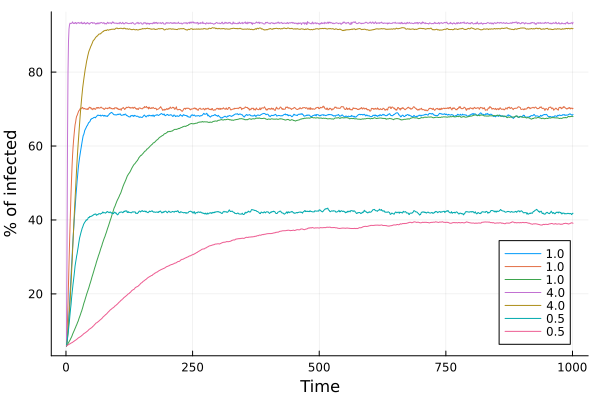

In [14]:
# Script launching predictions on different diseases on karat7 and printing 
# the precentage of infected at each time step.
betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]

predictions, taus = Simulation_SIS(karat7,2,betas,alphas,1000,1000)
Plots.plot(predictions, label=taus',xlabel="Time",ylabel="% of infected")

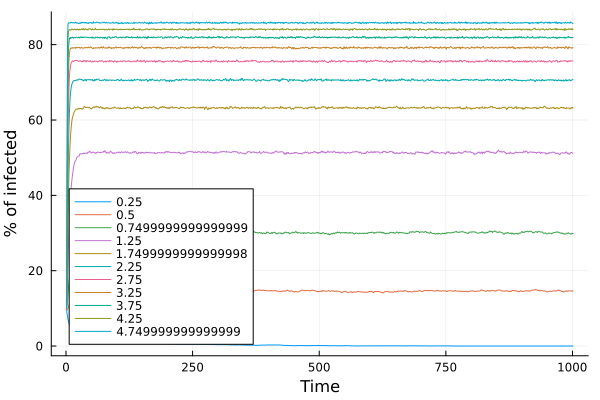

In [15]:
# Same as before but applied on toulouse_neigh. May be a bit long to run.
betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

predictions, taus = Simulation_SIS(toulouse_neigh,100,betas,alphas,1000,100)
Plots.plot(predictions, label=taus',xlabel="Time",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 7 (written):</strong> Change the initial number of infected in the scripts above, is it in accordance with your answer in Question 2 ?
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong><br>
The results of runnings showed that the initial number of infected in the scripts above has a small influence on the final number of infected people (i.e. its limit in practice) - the more people are initially infected the bigger the value of the limit is. But the number of initially infected peopele is particularly impactfull for the first time steps. So, we must admit that the general influence of this parameter is not so great as we have thought in first.</div>

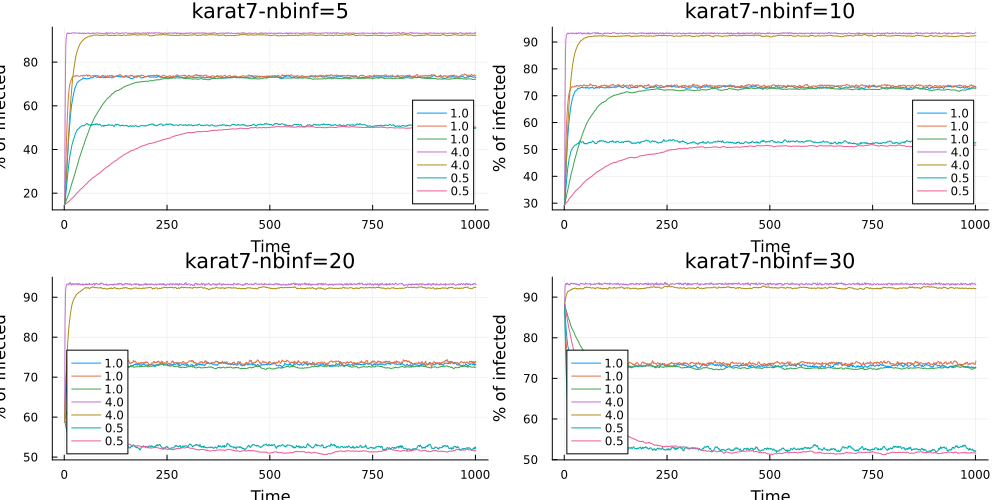

In [16]:
# Change the initial number of infected for karat7
betas=[0.05,0.1,0.01,0.4,0.04,0.05,0.005]
alphas=[0.05,0.1,0.01,0.1,0.01,0.1,0.01]

predictions1, taus1 = Simulation_SIS(karat7,5,betas,alphas,1000,1000)
p1 = Plots.plot(predictions1, title="karat7-nbinf=5", label=taus1',xlabel="Time",ylabel="% of infected")

predictions2, taus2 = Simulation_SIS(karat7,10,betas,alphas,1000,1000)
p2 = Plots.plot(predictions2, title="karat7-nbinf=10", label=taus2',xlabel="Time",ylabel="% of infected")

predictions3, taus3 = Simulation_SIS(karat7,20,betas,alphas,1000,1000)
p3 = Plots.plot(predictions3, title="karat7-nbinf=20", label=taus3',xlabel="Time",ylabel="% of infected")

predictions4, taus4 = Simulation_SIS(karat7,30,betas,alphas,1000,1000)
p4 = Plots.plot(predictions4, title="karat7-nbinf=30", label=taus4',xlabel="Time",ylabel="% of infected")

display(Plots.plot(p1, p2, p3, p4, layout=(2,2), size=(1000,500)))

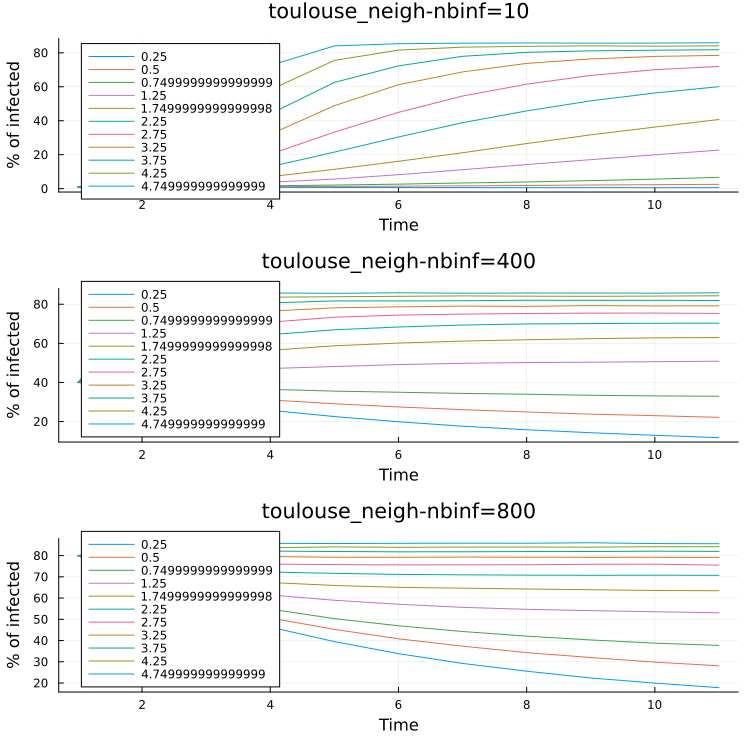

In [17]:
# Change the initial number of infected for toulouse_neigh
betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

predictions1, taus1 = Simulation_SIS(toulouse_neigh,10,betas,alphas,10,100)
p1 = Plots.plot(predictions1, title="toulouse_neigh-nbinf=10", label=taus1',xlabel="Time",ylabel="% of infected")

predictions2, taus2 = Simulation_SIS(toulouse_neigh,400,betas,alphas,10,100)
p2 = Plots.plot(predictions2, title="toulouse_neigh-nbinf=400", label=taus2',xlabel="Time",ylabel="% of infected")

predictions3, taus3 = Simulation_SIS(toulouse_neigh,800,betas,alphas,10,100)
p3 = Plots.plot(predictions3, title="toulouse_neigh-nbinf=800", label=taus3',xlabel="Time",ylabel="% of infected")

display(Plots.plot(p1, p2, p3, layout = (3,1), size=(750,750)))

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 8 (code):</strong> Implement a script plotting the maximum percentage of infected people according to $\tau$ over 300 time steps for 3 contact networks:

* A regular graph of 200 vertices with degree 2.
* A regular graph of 200 vertices with degree 5.
* A regular graph of 200 vertices with degree 10.

You can use the function <code>random_regular_graph(n,d)</code> of LighGraphs. As you probably need to use a certain number of different values of $\tau$ to visualize something interesting (the more there are the more the figure will be smooth) you should fix $\alpha$ and make $\beta$ vary. 

<span style="font-size:0.9em">A regular graph is a graph where each vertex has the same degree.</span>

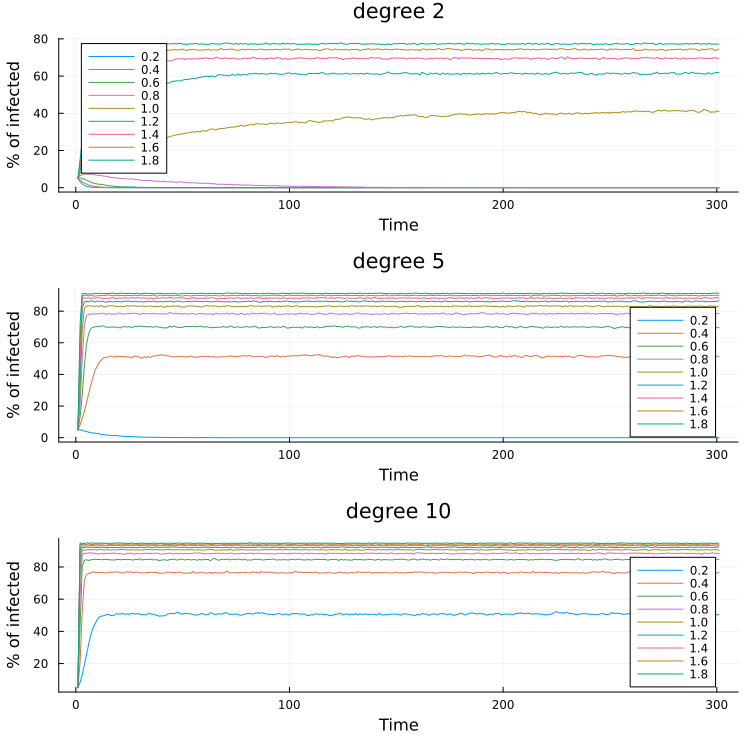

In [18]:
# Plots of the maximum percentage of infected people according to tau over 300 time 
# steps for 3 contact networks.
alphas = 0.5 * ones(9)
betas = [0.1, 0.2, 0.3, 0.40, 0.5, 0.6, 0.7, 0.8, 0.9,]

predictions1, taus1 = Simulation_SIS(random_regular_graph(200, 2), 10, betas, alphas, 300, 100)
p1 = Plots.plot(predictions1, title="degree 2", label=taus1',xlabel="Time",ylabel="% of infected")

predictions2, taus2 = Simulation_SIS(random_regular_graph(200, 5), 10, betas, alphas, 300, 100)
p2 = Plots.plot(predictions2, title="degree 5", label=taus2',xlabel="Time",ylabel="% of infected")

predictions3, taus3 = Simulation_SIS(random_regular_graph(200, 10), 10, betas, alphas, 300, 100)
p3 = Plots.plot(predictions3, title="degree 10", label=taus3',xlabel="Time",ylabel="% of infected")

display(Plots.plot(p1, p2, p3, layout = (3,1), size = (750,750)))

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 9 (written):</strong> Describe the figure and draw conclusions on the epidemic behavior for different degrees $d$ on regular graphs. Thus, in addition of the inner properties of the disease ($\alpha$, $\beta$, $\tau$) what other parameter is essential in the spreading ? Finally, what analogy can be done with real life from this experiment ?
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong><br>
We can observe on the plots above that the degree is another essential parameter in the spreading (at least for the regular graphs). Indeed, for a giver spreading rate, the more the value of degree increases the more are chances that the percentage of infected people will not tend towards zero in case of diseases with relatively small spreading rates, the faster the spreading of infection is and the higher its final value is. Thus, these results confirm the pertinence of the isolation measures that took place during the COVID-19 pandemic, for example.<br>
</div>

<div style="width:75%;margin:0 auto;">

## Part 2 - SIR and SAIR model
<a id='part2'></a>
    
<p style="text-align:justify;">Unfortunately SIS model is valuable for diseases we can catch back since a cured person can get ill again. This is true for the flu, the cold, etc. However COVID-19 might create immunity for whom already got it and SIS can not take into account immune or dead persons. That is why we propose in this part to consider another model more adapted to COVID-19 called SIR. It stands for Susceptible $\rightarrow$ Infected $\rightarrow$ Recovered where the susceptible group contains those who remain susceptible to the infection, the infected group consists of those who not only have the disease but are also in the contagious period of the disease, and the recovered group contains those who were ill, got cured, are not contagious and can not get ill anymore.</p>

<br>

<p style="font-size:0.9em">M. Youssef and C. Scoglio, <cite>"An individual-based approach to SIR epidemics in contact networks"</cite>, Journal of Theoretical Biology 283 (2011)</p>

<br>
    
<p style="text-align:justify;"> One limitation of SIR is that it does not model the reaction of humans when they feel the presence of the epidemic. Indeed, if feeling threaten or surrounded by infected, an individual may change its behaviors: wear mask, wash its hands, etc. This result in a smaller infection rate. That is why in this part we will also consider a variant of SIR called SAIR which stands for Susceptible $\rightarrow$ Alert $\rightarrow$ Infected $\rightarrow$ Recovered. A susceptible individual becomes infected by the infection rate $\beta_0$, an infected individual recovers and gets immune by the curing rate $\alpha$, an individual can observe the states of its neighbors, then a susceptible individual might go to the alert state if surrounded by infected individuals with an alert rate $\kappa$ on each contact with an infected, an alert inividual becomes infected by the infection rate $\beta_1$ where $0<\beta_1<\beta_0$. In our simple SAIR model, an individual can not go back to a susceptible state when he got into the alert state.</p>
    
<br>
    
<p style="font-size:0.9em"> F. Darabi Sahneh and C. Scoglio, <cite>"Epidemic Spread in Human Networks"</cite>, 50th IEEE Conf. Decision and Contol, Orlando, Florida (2011)</p>

<div style="width:75%;margin:0 auto;">

### 2.1 SIR
    
<p style="text-align:justify;">The vector containing the disease status <code>state</code> has to change a bit since we added a new state. Hence it will be an <code>Array{Int32,1}</code> where Susceptible=0, Infected=1, and Recovered=2.</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 10 (code):</strong> Implement the <code>function SIR</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$. Recovered vertices should appear in a different color (<code>colorant"purple"</code>).
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SIR(net,state,beta,alpha,t)</code> with your code.</span>

In [19]:
function SIR(net,state,beta,alpha,t)
    """Take a contact network at a certain state and apply t time steps
    of an SIR model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta (Float64): infection rate
       alpha (Float64): curing rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """
    
    # states convention : 0-susceptible, 1-infected, 2-recovered
    
    new_state = copy(state)
    
    for time_step=1:t
        
        for person=1:length(new_state)
            
            if new_state[person] == 1
                
                list_neighbors = neighbors(net, person)

                for neighbor in list_neighbors
                    
                    if new_state[neighbor] == 0
                        
                        if rand() < beta
                            new_state[neighbor] = 1
                        end
                    end
                end
                
                if rand() < alpha 
                    new_state[person] = 2
                end
            end
        end
    end
    return new_state
end

SIR (generic function with 1 method)

In [20]:
# Test on Karat7
state_karat7 = [rand([0,1]) for i=1:34] # 0-susceptible, 1-infected
nodecolor_karat7 = [colorant"green", colorant"orange", colorant"purple"]
nodefill_karat7 = nodecolor_karat7[[state_karat7[i] + 1 for i=1:length(state_karat7)]]
draw(PNG("karat7_before_SIR.png", 100cm, 100cm),gplot(graph_karat7, nodefillc = nodefill_karat7))
state_karat7 = SIR(graph_karat7, state_karat7, 0.1, 0.1, 10)
nodefill_karat7 = nodecolor_karat7[[state_karat7[i] + 1 for i=1:length(state_karat7)]]
draw(PNG("karat7_after_SIR.png", 100cm, 100cm), gplot(graph_karat7, nodefillc = nodefill_karat7))

In [21]:
# Test on N7_2A
state_n7_2a = [rand([0,1]) for i=1:sum(n_n7_2a)]  # 0-susceptible, 1-infected
nodecolor_n7_2a = [colorant"green", colorant"orange", colorant"purple"]
nodefill_n7_2a = nodecolor_n7_2a[[state_n7_2a[i] + 1 for i=1:length(state_n7_2a)]]
draw(PNG("n7_2a_before_SIR.png", 100cm, 100cm),gplot(graph_n7_2a, nodefillc = nodefill_n7_2a))
state_n7_2a = SIR(graph_n7_2a, state_n7_2a, 0.8, 0.4, 5)
nodefill_n7_2a = nodecolor_n7_2a[[state_n7_2a[i] + 1 for i=1:length(state_n7_2a)]]
draw(PNG("n7_2a_after_SIR.png", 100cm, 100cm), gplot(graph_n7_2a, nodefillc = nodefill_n7_2a))

In [22]:
# Test on Toulouse_neigh
state_toulouse_neigh = [rand([0,1]) for i=1:1000] # 0-susceptible, 1-infected
nodecolor_toulouse_neigh = [colorant"green", colorant"orange", colorant"purple"]
nodefill_toulouse_neigh = nodecolor_toulouse_neigh[[state_toulouse_neigh[i] + 1 for i=1:length(state_toulouse_neigh)]]
draw(PNG("toulouse_neigh_before_SIR.png", 100cm, 100cm), gplot(graph_toulouse_neigh, nodefillc = nodefill_toulouse_neigh))
state_toulouse_neigh = SIR(graph_toulouse_neigh, state_toulouse_neigh, 0.8, 0.4, 15)
nodefill_toulouse_neigh = nodecolor_toulouse_neigh[[state_toulouse_neigh[i] + 1 for i=1:length(state_toulouse_neigh)]]
draw(PNG("toulouse_neigh_after_SIR.png", 100cm, 100cm), gplot(graph_toulouse_neigh, nodefillc = nodefill_toulouse_neigh))

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 11 (code):</strong> Implement the <code>function Simulation_SIR</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SIR(net,nbinf,betas,alphas,t,nbsimu)</code> with your code.</span>

In [23]:
function Simulation_SIR(net,nbinf,betas,alphas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SIR over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas (Array{Float64,1}): array of infection rate on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,3}): the prediction of the percentage of 
            infected, the percentage of susceptible and the 
            percentage of recovered at each time step and for each 
            disease. The first dimension contains the time steps,
            the second contains the diseases, and the third the status
            (Infected: [:,:,1], Recovered: [:,:,2], Susceptible: [:,:,3])
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    map_status = [1,2,0]
    
    predictions = zeros(t+1, length(betas), 3)
    
    for simu=1:nbsimu
        
        state = zeros(length(collect(vertices(net))))       
    
        for x in sample(1:length(state), nbinf, replace=false)
            state[x] = 1
        end
        
        for couple=1:length(alphas)
            for status=1:3
                predictions[1,couple,status] = predictions[1,couple,status] + 100 * count(i->(i==map_status[status]),state) / length(state)
            end
            couple_state = copy(state)
            
            for step=2:(t+1)
                couple_state = SIR(net, couple_state, betas[couple], alphas[couple], 1)
                for status=1:3
                    predictions[step,couple,status] = predictions[step,couple,status] + 100 * count(i->(i==map_status[status]),couple_state) / length(state)
                end
            end
        end
    end
    predictions = predictions ./ nbsimu
 
    return predictions, betas ./ alphas
end

Simulation_SIR (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 12 (written):</strong> Run the script below and describe what you see. Why the infected curve does not behave the same as for SIS ? 
    
<br>

<div style="background-color:#E7F1D1"> <strong>Answer:</strong><br>
We can observe that the "infection" curve is no more monotonous and increasing in values, but it has now a maximum of about 50% and then decreases monotonously tending toward zero. It is quite logical because, since the recovered status is a stable one, the percentage of recovered people can only grow with time (and it is the case here). It implies that the percentage of susceptible people decreases in general with time, which explains the presence of a maximum for the percentage of infected people followed by a monotonous decrease towards zero.
</div>

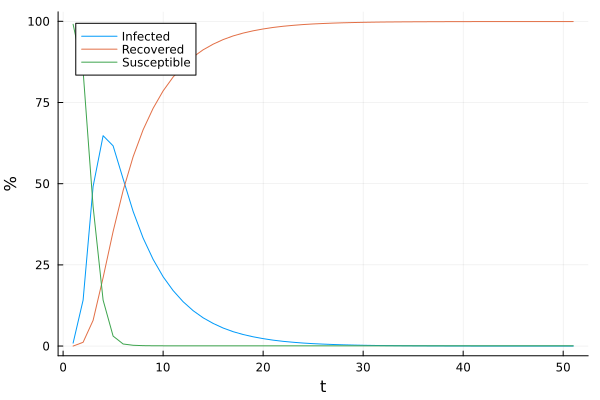

In [24]:
# Script launching prediction on one disease on n7_2A and plotting the percentage
# of infected, susceptible and recovered at each time step.
predictions, taus = Simulation_SIR(n7_2A,2,[0.3],[0.2],50,1000)

Plots.plot([predictions[:,:,1] predictions[:,:,2] predictions[:,:,3]],
           label=["Infected" "Recovered" "Susceptible"],xlabel="t",ylabel="%")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 13 (written):</strong> As for Question 6 script 2 plot the evolution of the percentage of infected for many $\tau$. Describe what you see.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong><br>
According to the plot below, bigger $\tau$ is and higher the value of the maximum percentage of infected is (here it is the same as the fact that more people are infected in total). However, for all tested $\tau$ the curves decrease with comparable rates (not exactly the same but still).
</div>

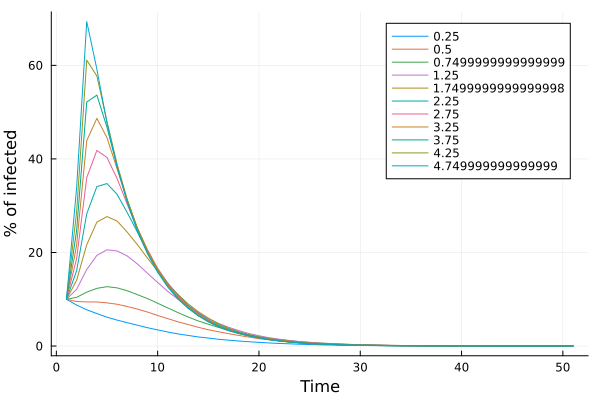

In [25]:
# Equivalent experiment as for Question 6 script 2
betas = [0.05,0.1,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
alphas = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]

predictions, taus = Simulation_SIR(toulouse_neigh,100,betas,alphas,50,100)

Plots.plot(predictions[:,:,1], label=taus',xlabel="Time",ylabel="% of infected")

<div style="width:75%;margin:0 auto;">

<strong style="color:cornflowerblue">Question 14 (code):</strong> Implement a script plotting the number of infected over 75 time steps for $\beta=0.3$ and $\alpha=0.2$ fixed and on 3 contact networks:
    
* A regular graph of 200 vertices with degree 2.
* A regular graph of 200 vertices with degree 5.
* A regular graph of 200 vertices with degree 10.
    

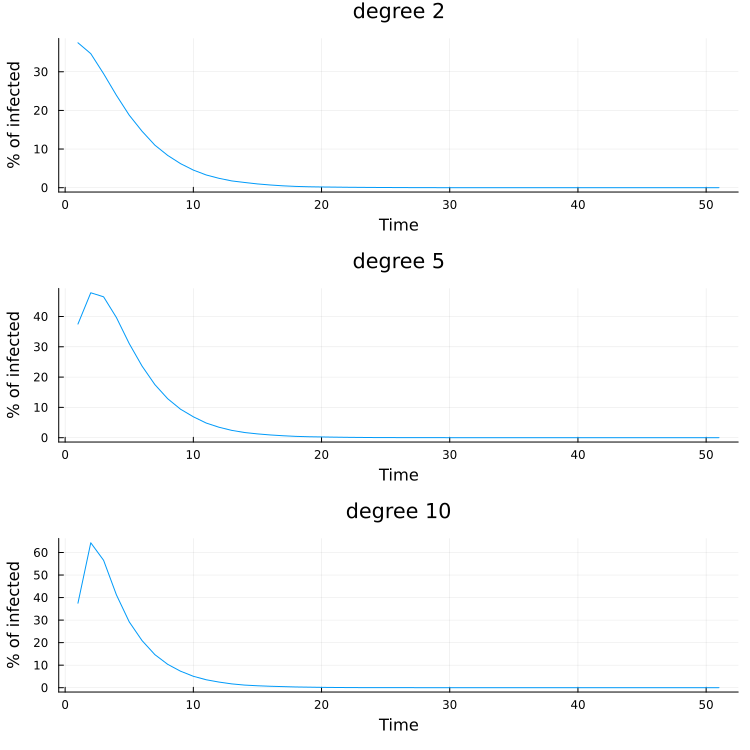

In [26]:
# Plots of the number of infected people according to tau over 75 time 
# steps for 3 contact networks.

predictions1 = Simulation_SIR(random_regular_graph(200, 2), 75, [0.2], [0.3], 50, 100)[1]
p1 = Plots.plot(predictions1[:,:,1], title="degree 2", label=false, xlabel="Time",ylabel="% of infected")

predictions2 = Simulation_SIR(random_regular_graph(200, 5), 75, [0.2], [0.3], 50, 100)[1]
p2 = Plots.plot(predictions2[:,:,1], title="degree 5", label=false, xlabel="Time",ylabel="% of infected")

predictions3 = Simulation_SIR(random_regular_graph(200, 10), 75, [0.2], [0.3], 50, 100)[1]
p3 = Plots.plot(predictions3[:,:,1], title="degree 10", label=false, xlabel="Time",ylabel="% of infected")

display(Plots.plot(p1, p2, p3, layout = (3,1), size = (750,750)))

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 15 (written):</strong> From the previous figure, explain why lockdown can be interesting when hospital places are lacking ?

<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong><br>
We can interpret the results of the plots above as the fact that the more interactions there are between people during an epidemic, the more people will be infected at the peak of the epidemic (note in passing that the general recovery will then be faster though). For hospitals, it is important to have enough places during peak periods. In this sense, the isolation strategy directly helps hospitals.
</div>

<div style="width:75%;margin:0 auto;">

### 2.2 SAIR
    
<p style="text-align:justify;">The vector containing the disease status <code>state</code> has to change a bit since we added a new state. Hence it will be an <code>Array{Int32,1}</code> where Susceptible=0, Infected=1, Recovered=2, and Alert=3.</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 16 (code):</strong> Implement the <code>function SAIR</code> (respect the header and the specifications). You can use <code>rand</code> to translate the probabilities. Test your algorithm on <code>karat7</code>, <code>n7_2A</code>, and <code>toulouse_neigh</code> with arbitrary $\beta$, $\alpha$, and $t$. Alerted vertices should appear in a different color (<code>colorant"lightgreen"</code>).
    
<span style="font-size:0.9em">The corrector should be able to write <code>new_state = SAIR(net,state,beta0,beta1,alpha,kappa,t)</code> with your code.</span>

In [27]:
function SAIR(net,state,beta0,beta1,alpha,kappa,t)
    """Take a contact network at a certain state and apply t time steps
    of an SAIR model.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta0 (Float64): infection rate when not alert
       beta1 (Float64): infection rate when alert
       alpha (Float64): curing rate
       kappa (Float64): alerting rate
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """      
    
    # states convention : 0-susceptible, 1-alerted, 2-infected, 3-recovered
    
    new_state = copy(state)
    
    for time_step=1:t
        
        for person=1:length(new_state)
            
            if new_state[person] == 2
                
                list_neighbors = neighbors(net, person)

                for neighbor in list_neighbors
                    
                    if new_state[neighbor] <= 0
                        
                        rand_number = rand() # it seems more logical to use the same random number here
                        
                        if new_state[neighbor] == 0
                        
                            if rand_number < beta0
                                new_state[neighbor] = 2
                            end
                            
                        elseif new_state[neighbor] == 1
                        
                            if rand_number < beta1
                                new_state[neigbor] = 2
                            end
                        end
                    end
                end     
                if rand() < alpha 
                    new_state[person] = 3
                end
                
            elseif new_state[person] == 0
                list_neighbors = neighbors(net, person)
                
                index_neighbor = 1
                
                while index_neighbor <= length(list_neighbors)
                    
                    if list_neighbors[index_neighbor] == 2
                    
                        if rand() < kappa
                            new_state[person] = 1
                            break
                        end
                    end
                    index_neighbor = index_neighbor + 1
                end
            end
        end
    end
    return new_state
    
end

SAIR (generic function with 1 method)

In [28]:
# Test on Karat7
state_karat7 = [rand([0,2]) for i=1:34]  # 0-susceptible, 2-infected
nodecolor_karat7 = [colorant"green", colorant"lightgreen", colorant"orange", colorant"purple"]
nodefill_karat7 = nodecolor_karat7[[state_karat7[i] + 1 for i=1:length(state_karat7)]]
draw(PNG("karat7_before_SAIR.png", 100cm, 100cm),gplot(graph_karat7, nodefillc = nodefill_karat7))
state_karat7 = SAIR(graph_karat7, state_karat7, 0.1, 0.01, 0.1, 0.5, 10)
nodefill_karat7 = nodecolor_karat7[[state_karat7[i] + 1 for i=1:length(state_karat7)]]
draw(PNG("karat7_after_SAIR.png", 100cm, 100cm), gplot(graph_karat7, nodefillc = nodefill_karat7))

In [29]:
# Test on N7_2A
state_n7_2a = [rand([0,2]) for i=1:sum(n_n7_2a)]  # 0-susceptible, 2-infected
nodecolor_n7_2a = [colorant"green", colorant"lightgreen", colorant"orange", colorant"purple"]
nodefill_n7_2a = nodecolor_n7_2a[[state_n7_2a[i] + 1 for i=1:length(state_n7_2a)]]
draw(PNG("n7_2a_before_SAIR.png", 100cm, 100cm),gplot(graph_n7_2a, nodefillc = nodefill_n7_2a))
state_n7_2a = SAIR(graph_n7_2a, state_n7_2a, 0.1, 0.01, 0.1, 0.5, 10)
nodefill_n7_2a = nodecolor_n7_2a[[state_n7_2a[i] + 1 for i=1:length(state_n7_2a)]]
draw(PNG("n7_2a_after_SAIR.png", 100cm, 100cm), gplot(graph_n7_2a, nodefillc = nodefill_n7_2a))

In [30]:
# Test on Toulouse_neigh
state_toulouse_neigh = [rand([0,2]) for i=1:1000]  # 0-susceptible, 2-infected
nodecolor_toulouse_neigh = [colorant"green", colorant"lightgreen", colorant"orange", colorant"purple"]
nodefill_toulouse_neigh = nodecolor_toulouse_neigh[[state_toulouse_neigh[i] + 1 for i=1:length(state_toulouse_neigh)]]
draw(PNG("toulouse_neigh_before_SAIR.png", 100cm, 100cm), gplot(graph_toulouse_neigh, nodefillc = nodefill_toulouse_neigh))
state_toulouse_neigh = SAIR(graph_toulouse_neigh, state_toulouse_neigh, 0.1, 0.01, 0.1, 0.5, 10)
nodefill_toulouse_neigh = nodecolor_toulouse_neigh[[state_toulouse_neigh[i] + 1 for i=1:length(state_toulouse_neigh)]]
draw(PNG("toulouse_neigh_after_SAIR.png", 100cm, 100cm), gplot(graph_toulouse_neigh, nodefillc = nodefill_toulouse_neigh))

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 17 (code):</strong> Implement the <code>function Simulation_SAIR</code> (respect the header and the specifications).
    
<span style="font-size:0.9em">The corrector should be able to write <code>predictions, taus = Simulation_SAIR(net,nbinf,betas0,betas1,alphas,kappas,t,nbsimu)</code> with your code.</span>

In [31]:
function Simulation_SAIR(net,nbinf,betas0,betas1,alphas,kappas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SAIR over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas0 (Array{Float64,1}): array of infection rate when not alert on edges
       betas1 (Array{Float64,1}): array of infection rate when alert on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       kappas (Array{Float64,1}): array of alerting rate on edges
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,3}): the prediction of the percentage of 
            infected, the percentage of susceptible and the 
            percentage of recovered at each time step and for each 
            disease. The first dimension contains the time steps,
            the second contains the diseases, and the third the status
            (Infected: [:,:,1], Recovered: [:,:,2], Susceptible: [:,:,3])
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    map_status = [2,3,0] # 1 of 4 lines that change in comparision with Simulation_SIR
    predictions = zeros(t+1, length(betas0), 3) # the 2nd changed line
    
    for simu=1:nbsimu
        
        state = zeros(length(collect(vertices(net))))       
    
        for x in sample(1:length(state), nbinf, replace=false)
            state[x] = 2   # the 3rd changed line
        end
        
        for couple=1:length(alphas)
            for status=1:3
                predictions[1,couple,status] = predictions[1,couple,status] + 100 * count(i->(i==map_status[status]),state) / length(state)
            end
            couple_state = copy(state)
            
            for step=2:(t+1)
                couple_state = SAIR(net, couple_state, betas0[couple], betas1[couple], alphas[couple], kappas[couple], 1)  # the 4th changed line
                for status=1:3
                    predictions[step,couple,status] = predictions[step,couple,status] + 100 * count(i->(i==map_status[status]),couple_state) / length(state)
                end
            end
        end
    end
    predictions = predictions ./ nbsimu
 
    return predictions, betas0 ./ alphas
end

Simulation_SAIR (generic function with 1 method)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 18 (written):</strong> Run the script below comparing the number of infected of SAIR and SIR and comment what you see.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong><br>
The plot shows that for the tested set of data with quite realistic values, the total number of people infected is significantly less (about 3 times here) in the SAIR model. The interpretation of this is that the application of barrier measures during an epidemic has a drastic impact on its spread.
</div>

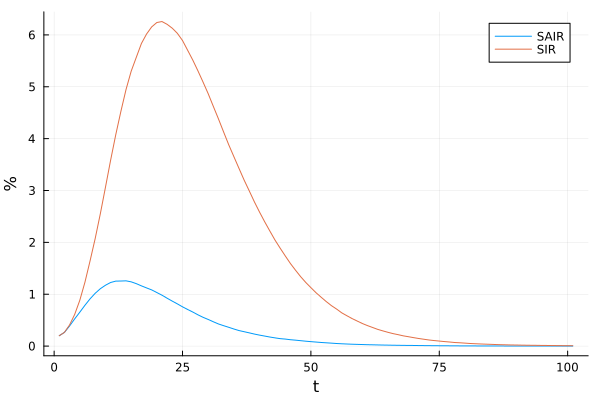

In [32]:
# Script launching prediction on one disease on toulouse_neigh and plotting the percentage
# of infected at each time step for SIR and SAIR.
predictions1, taus1 = Simulation_SAIR(toulouse_neigh,2,[0.2],[0.1],[0.1],[0.4],100,1000)
predictions2, taus2 = Simulation_SIR(toulouse_neigh,2,[0.2],[0.1],100,1000)

Plots.plot([predictions1[:,:,1] predictions2[:,:,1]],
           label=["SAIR" "SIR"],xlabel="t",ylabel="%")

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 19 (written):</strong> Of course the presented SIS, SIR, and SAIR models are limitated in their modelization of the reality. Formulate few of these limitations (at least 2). 
Propose few algorithm addons/ideas (at least 2) which would make the models more complex and more accurate in regards to the reality.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong>Answer:</strong><br>
The SAIR model being globally the finest and most realistic of the 3, we will only mention the defects and improvements for this model.<br>
<strong>Limitations</strong>:<br>
<u>SIS case</u>: 
Since we use the $\alpha$ and $\beta$ parameters and people can assume only two values (healthy or infected), we do not account for the immunity potential of infected people, who after contracting the disease, become less susceptible to contracting the virus again.
<br>
<u>SIR case</u>:
As defined, a person who contracts the disease once becomes immune to contracting the same disease again. This kind of approach is not always true, especially for COVID-19, because an individual who has already been infected, despite acquiring some immunity, can still contract the disease again.
<br>
<u>SAIR case</u>:
Like the SIR model, the SAIR model does not consider that a recovered individual can still contract the disease. Besides, even if with the SAIR model the human reaction (alert state) is considered, the alert state should not be irreversible compared to the susceptible state, because in reality if a person knows that his/her contacts have all recovered, he/she tends to let his/her guards down (and thus returns to the susceptible state of the model).<br>
<strong>Theoretical improvements</strong>:<br>
1) To address the problem cited in the SIR and SAIR cases, we can establish a rate of possibility of reinfection of an already cured individual. This rate can be increased over time to represent the loss of immunity of a cured individual. This approach comes closer to reality, especially for the case of COVID-19.

2) Consider the mutations of disease viruses. Viruses mutate very frequently and infection rates tend to change. For this, you can create a model that considers the mutation of a virus in relation to infection rates, so for each of the mutated virus types, we can have a different infection rate for each of them.

3) Consider the time of year when the disease is spreading. This can be an important factor, because at certain times of the year (such as in winter when there is less indoor air circulation) the infection rate for certain diseases is relatively higher (or lower).

4) Consider deaths of individuals. Diseases like COVID-19 with relatively high rates of hospitalizations followed by death, we can create a model that considers this type of situation by eliminating one node from the graph, which would represent a death of an individual.<br>
<strong>Practical improvements</strong>:<br>
We will now implement another model, which we called SAII, based on the SAIR which takes into account its limitations linked to the stability of the cured state and the irreversibility of the alert state, and fixes them.
</div>

In [33]:
function SAII(net,state,beta0,beta1,alpha,kappa,lambda,t)
    """Take a contact network at a certain state and apply t time steps
    of an SAII model. In comparision with the SAIR model, the second I states for "immune". Besides, the dynamic
    of the alerted state is improved.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       state (Array{Int32,1}): disease status of each vertex
       beta0 (Float64): infection rate when not alert
       beta1 (Float64): infection rate when alert
       alpha (Float64): curing rate
       kappa (Float64): alerting rate
       lambda {Float64}: rate of loss of immunity
       t (Int32): number of time step
    
    RETURNS
        (Array{Int32,1}): The new state of the contact network after t time steps.
    """      
    # states convention : 0-susceptible, 1-alerted, 2-infected, 3-immuned
    new_state = copy(state)
    
    for time_step=1:t
        
        for person=1:length(new_state)
            
            list_neighbors = neighbors(net, person)
            
            if new_state[person] == 2
                
                list_neighbors = neighbors(net, person)

                for neighbor in list_neighbors
                    
                    if new_state[neighbor] <= 0
                        
                        rand_number = rand() # it seems more logical to use the same random number here
                        
                        if new_state[neighbor] == 0
                        
                            if rand_number < beta0
                                new_state[neighbor] = 2
                            end
                            
                        elseif new_state[neighbor] == 1
                        
                            if rand_number < beta1
                                new_state[neigbor] = 2
                            end
                        end
                    end
                end     
                if rand() < alpha 
                    new_state[person] = 3
                end
                
            elseif new_state[person] == 0

                index_neighbor = 1
                
                while index_neighbor <= length(list_neighbors)
                    
                    if list_neighbors[index_neighbor] == 2
                    
                        if rand() < kappa
                            new_state[person] = 1
                            break
                        end
                    end
                    index_neighbor = index_neighbor + 1
                end
                
            elseif new_state[person] == 1
                
                index_neighbor = 1
                
                while index_neighbor <= length(list_neighbors)
                
                    if list_neighbors[index_neighbor] == 2 
                        break
                    end
                    
                    index_neighbor = index_neighbor + 1
                end
                
            else
                if rand() < lambda
                    new_state[person] = 0
                end
            end
        end
    end
    return new_state
end

SAII (generic function with 1 method)

<strong>Remark:</strong><br>
The probability $\lambda$ of no longer being immune can be interpreted as follows: if, for example, this probability is equal to 0.1, then statistically this has about the same effect as imposing that after 10 time steps the immune persons lose their immunity.

In [34]:
# Test on Karat7
state_karat7 = [rand([0,2]) for i=1:34]  # 0-susceptible, 2-infected
nodefill_karat7 = nodecolor_karat7[[state_karat7[i] + 1 for i=1:length(state_karat7)]]
draw(PNG("karat7_before_SAII.png", 100cm, 100cm),gplot(graph_karat7, nodefillc = nodefill_karat7))
state_karat7 = SAII(graph_karat7, state_karat7, 0.1, 0.01, 0.1, 0.5, 0.1, 10)
nodefill_karat7 = nodecolor_karat7[[state_karat7[i] + 1 for i=1:length(state_karat7)]]
draw(PNG("karat7_after_SAII.png", 100cm, 100cm), gplot(graph_karat7, nodefillc = nodefill_karat7))

In [35]:
# Test on N7_2A
state_n7_2a = [rand([0,2]) for i=1:sum(n_n7_2a)]  # 0-susceptible, 2-infected
nodefill_n7_2a = nodecolor_n7_2a[[state_n7_2a[i] + 1 for i=1:length(state_n7_2a)]]
draw(PNG("n7_2a_before_SAII.png", 100cm, 100cm),gplot(graph_n7_2a, nodefillc = nodefill_n7_2a))
state_n7_2a = SAII(graph_n7_2a, state_n7_2a, 0.1, 0.01, 0.1, 0.5, 0.1, 10)
nodefill_n7_2a = nodecolor_n7_2a[[state_n7_2a[i] + 1 for i=1:length(state_n7_2a)]]
draw(PNG("n7_2a_after_SAII.png", 100cm, 100cm), gplot(graph_n7_2a, nodefillc = nodefill_n7_2a))

In [36]:
# Test on Toulouse_neigh
state_toulouse_neigh = [rand([0,2]) for i=1:1000]  # 0-susceptible, 2-infected
nodefill_toulouse_neigh = nodecolor_toulouse_neigh[[state_toulouse_neigh[i] + 1 for i=1:length(state_toulouse_neigh)]]
draw(PNG("toulouse_neigh_before_SAII.png", 100cm, 100cm), gplot(graph_toulouse_neigh, nodefillc = nodefill_toulouse_neigh))
state_toulouse_neigh = SAII(graph_toulouse_neigh, state_toulouse_neigh, 0.1, 0.01, 0.1, 0.5, 0.1, 10)
nodefill_toulouse_neigh = nodecolor_toulouse_neigh[[state_toulouse_neigh[i] + 1 for i=1:length(state_toulouse_neigh)]]
draw(PNG("toulouse_neigh_after_SAII.png", 100cm, 100cm), gplot(graph_toulouse_neigh, nodefillc = nodefill_toulouse_neigh))

In [37]:
function Simulation_SAII(net,nbinf,betas0,betas1,alphas,kappas,lambdas,t,nbsimu)
    """Take a contact network, different diseases (defined by 
    different parameters alpha and beta), a number of initial
    infected people and process nbsimu simulations of SAIR over
    t time steps. You will provide the prediction of the 
    percentage of infected at each time t as well as the 
    spreading rate of each disease.
    
    PARAMS
       net (LightGraph): graph representing the contact network
       nbinf (Int32): number of infected at the start of each 
            simulation
       betas0 (Array{Float64,1}): array of infection rate when not alert on edges
       betas1 (Array{Float64,1}): array of infection rate when alert on edges
       alphas (Array{Float64,1}): array of curing rate on vertices
       kappas (Array{Float64,1}): array of alerting rate on edges
       lambdas (Array{Float64,1}): array of loss of immunity rate
       t (Int32): number of time step
       nbsimu (Int32): number of simulations
    
    RETURNS
        (Array{Float64,3}): the prediction of the percentage of 
            infected, the percentage of susceptible and the 
            percentage of recovered at each time step and for each 
            disease. The first dimension contains the time steps,
            the second contains the diseases, and the third the status
            (Infected: [:,:,1], Immuned: [:,:,2], Susceptible: [:,:,3])
        (Array{Float64,1}): effective spreading rate for each 
            disease
    """
    map_status = [2,3,0] # 1 of 4 lines that change in comparision with Simulation_SIR
    predictions = zeros(t+1, length(betas0), 3) # the 2nd changed line
    
    for simu=1:nbsimu
        
        state = zeros(length(collect(vertices(net))))       
    
        for x in sample(1:length(state), nbinf, replace=false)
            state[x] = 2   # the 3rd changed line
        end
        
        for couple=1:length(alphas)
            for status=1:3
                predictions[1,couple,status] = predictions[1,couple,status] + 100 * count(i->(i==map_status[status]),state) / length(state)
            end
            couple_state = copy(state)
            
            for step=2:(t+1)
                couple_state = SAII(net, couple_state, betas0[couple], betas1[couple], alphas[couple], kappas[couple], lambdas[couple], 1)  # the 4th changed line
                for status=1:3
                    predictions[step,couple,status] = predictions[step,couple,status] + 100 * count(i->(i==map_status[status]),couple_state) / length(state)
                end
            end
        end
    end
    predictions = predictions ./ nbsimu
 
    return predictions, betas0 ./ alphas
end

Simulation_SAII (generic function with 1 method)

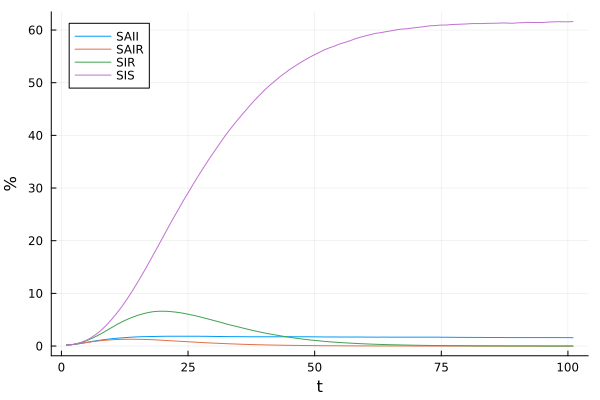

In [38]:
predictions1, taus1 = Simulation_SAII(toulouse_neigh,2,[0.2],[0.1],[0.1],[0.4],[0.1],100,1000)
predictions2, taus2 = Simulation_SAIR(toulouse_neigh,2,[0.2],[0.1],[0.1],[0.4],100,1000)
predictions3, taus3 = Simulation_SIR(toulouse_neigh,2,[0.2],[0.1],100,1000)
predictions4, taus4 = Simulation_SIS(toulouse_neigh,2,[0.2],[0.1],100,1000)

Plots.plot([predictions1[:,:,1] predictions2[:,:,1] predictions3[:,:,1] predictions4[:,:,1]],
           label=["SAII" "SAIR" "SIR" "SIS"],xlabel="t",ylabel="%")

<strong>Interpretation:</strong><br>
As expected, the fact of having time-limited immunity makes the shape of the curve of the number of infected persons similar in nature to that of the SIS model (i.e. converges but not to 0). Moreover, given the relatively small number of time steps compared to the probability of losing immunity (factor 10), it is not surprising to see that the total number of infected persons is not very far from the SAIR model (at least compared to the SIS model)

<div style="width:75%;margin:0 auto;">

## Part 3 - Discover patient zero
    
<p style="text-align:justify;"> In the two previous parts you may have realised that understanding and controlling the spread of epidemics on contact networks is an important task. However, information about
the origin of the epidemic could be also extremely useful to reduce or prevent future outbreaks. Thus, in this part we will focus on algorithm solutions to answer this issue.</p>
    
<p style="text-align:justify;"> The stochastic nature of infection propagation makes the estimation of the epidemic origin intrinsically hard: indeed, different initial conditions can lead to the same configuration at the observation time. Methods such as the distance centrality or the Jordan center try to approximate it. They both rely on spatial information by stating that the first infected is probably at the center of the cluster of infection. Mathematically:
    
* The jordan center is expressed as $\min_{v\in \mathcal{I}}\max_{n\in \mathcal{I}}d(v,n)$ where $\mathcal{I}$ is a connected component of the original contact network containing all infected and recovered vertices, and where $d(\cdot,\cdot)$ is the distance (= the shortest path) between 2 vertices (if not weighted graph each edge accounts for 1 unit). 
* The distance centrality is expressed as $\min_{v\in \mathcal{I}}\sum_{n\in \mathcal{I}}d(v,n)(\delta_{n,I} + \delta_{n,R}/\alpha)$, where $\delta_{n,I}=1$ if the vertex n is infected ($=0$ otherwise), and where $\delta_{n,R}=1$ if the vertex n is recovered ($=0$ otherwise). You may note that in distance centrality we increase the weight of the recovered vertices by a factor $1/\alpha$, it translates the fact that recovered vertices tend to be closer to the origin of the epidemic since they probably got ill before.
    
    
We formulate the problem as follow: given a contact network and a snapshot of epidemic spread at a certain time, determine the infection source. A snapshot is a given <code>state</code> array for a contact network.</p>

<br>
    
<p style="font-size:0.9em"> A. Y. Lokhov, M. Mézard, H. Ohta, and L. Zdeborová, <cite>"Inferring the origin of an epidemic with a dynamic message-passing algorithm"</cite>, Physical Review (2014)</p>

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 20 (code):</strong> Implement the <code>function jordan</code> (respect the header and the specifications). You will need to use the function <code>dijkstra_shortest_paths</code> of the LighGraphs library, refer to the doc for more information. If there are multiple minimal vertices, then return the first one.
    
<span style="font-size:0.9em">The corrector should be able to write <code>zero = jordan(g,state,alpha)</code> with your code.</span>

In [39]:
function jordan(g,state)
    """Find patient zero by mean of the jordan center method.
    
    PARAMS
        g (LightGraph): graph representing the contact network
        state (Array{Int32,1}): disease status of each vertex
    
    RETURNS
        (Int32): the patient zero vertex number 
    """
    # Initializes auxiliary variables
    min = Inf
    min_index = -1
    indices = findall(x->(x==1)|(x==2),state) 
    not_indices = findall(x->(x==0),state) 
    
    for vertex in indices
        shortest_path = dijkstra_shortest_paths(g, vertex)
        # Set not useful vertices as negative distance 
        dists = shortest_path.dists
        dists[not_indices] = -ones(length(not_indices)) 
        max = findmax(dists)[1]
        
        if min > max
            min = max
            min_index = vertex
        end   
    end

    return min_index
end

jordan (generic function with 1 method)

<div style="width:75%;margin:0 auto;">
    
<strong style="color:cornflowerblue">Question 21 (code):</strong> Implement the <code>function distance</code> (respect the header and the specifications). You will need to use the function <code>dijkstra_shortest_paths</code> of the LighGraphs library, refer to the doc for more information. If there are multiple minimal vertices, then return the first one.
    
<span style="font-size:0.9em">The corrector should be able to write <code>zero = distance(g,state,alpha)</code> with your code.</span>

In [40]:
function distance(g,state,alpha=1.)
    """Find patient zero by mean of the distance centrality method.
    
    PARAMS
        g (LightGraph): graph representing the contact network
        state (Array{Int32,1}): disease status of each vertex
        alpha (Float64): curing rate
    
    RETURNS
        (Int32): the patient zero vertex number 
    """
    
    # Initializes auxiliary variables
    min = Inf
    min_index = -1
    indices = findall(x->(x==1)|(x==2),state) 
    
    for vertex in indices
        s = 0
        shortest_path = dijkstra_shortest_paths(g, vertex)
        
        for n in indices
            if state[n] == 1
                delta_i = 1
                delta_r = 0
            elseif state[n] == 2
                delta_i = 0
                delta_r = 1
            else
                delta_i = 0
                delta_r = 0
            end
            
            s += shortest_path.dists[n] * (delta_i + delta_r/alpha)
        end
        
        if min > s
            min = s
            min_index = vertex
        end
    end

    return min_index
end

distance (generic function with 2 methods)

<div style="width:75%;margin:0 auto;">

<strong style="color:cadetblue">Question 22 (written):</strong> Run the 3 following scripts using your functions <code>jordan</code> and <code>distance</code> and comment on the results.
    
The contact network is karat7 for 2 different patient zero and a $50\times 50$ grid. The real patient zero ("Z"), your jordan ("J") and distance ("D") approximations are appearing in <code>colorant"lightblue"</code>.
    
<br>
    
<div style="background-color:#E7F1D1"> <strong> Answer:</strong>   
<br>For the first script available, we can notice that the real zero patient was found by the two algorithims. <br>
In the case of the second script the real zero patient has not been found by none of the algorithms even though it was one of their neighbours; besides the results the Distance and Jordan functions are not the same. <br>    
Finally, for the third script the analysis is almost the same as the second script, however the distance between the real zero patient and the result of the Distance function is slighly better compared to the Jordan function (distances 3 and 4 respectively to the real patient zero), but this is not significant compared with the size of the grid (50x50). <br>
 The fact that the real patient zero is not always found is due to a probabilistc nature of the epidemic spreading. The experimental zero patient that were found by each of the algorithms correponds to the person with the highest probability (related to a specific criteria) of being the patient zero.
</div>

In [41]:
# Loading a snapshot of karat7
@load "karat7_Q22_1.jld2" g state pat_zero alpha beta loc_x loc_y
g = Graphs.SimpleGraphs.smallgraph(:karate)

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("karat7_Q22_1.png", 20cm, 20cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /home/thiago/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:495


In [42]:
# Loading a snapshot of karat7
@load "karat7_Q22_2.jld2" g state pat_zero alpha beta loc_x loc_y
g = Graphs.SimpleGraphs.smallgraph(:karate)

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("karat7_Q22_2.png", 20cm, 20cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /home/thiago/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:495


In [43]:
# Loading a snapshot of grid50
@load "grid50_Q22.jld2" g state pat_zero alpha beta loc_x loc_y
g = Graphs.SimpleGraphs.grid([50,50])

# Run the patient zero finding function
cent_pat_zero = distance(g,state,alpha)
jor_pat_zero = jordan(g,state)

# Some display options 
labels = Array{String, 1}(undef,nv(g))
for k=1:nv(g)
    if state[k]==1
        labels[k]="I"
    elseif state[k]==2
        labels[k]="R"
    else
        labels[k]="S"
    end
end

if cent_pat_zero==jor_pat_zero==pat_zero
    labels[cent_pat_zero]="C+J+Z"
elseif cent_pat_zero==jor_pat_zero
    labels[cent_pat_zero]="C+J"
    labels[pat_zero]="Z"
elseif cent_pat_zero==pat_zero
    labels[cent_pat_zero]="C+Z"
    labels[jor_pat_zero]="J"
elseif jor_pat_zero==pat_zero
    labels[jor_pat_zero]="J+Z"
    labels[cent_pat_zero]="C"
else
    labels[cent_pat_zero]="C"
    labels[jor_pat_zero]="J"
    labels[pat_zero]="Z"
end

nodecolor = [colorant"lightseagreen", colorant"orange", colorant"purple"]
colors = nodecolor[state + ones(Int32,nv(g))]
colors[pat_zero] = colorant"lightblue"
colors[cent_pat_zero] = colorant"lightblue"
colors[jor_pat_zero] = colorant"lightblue"

# Display
draw(PNG("grid50_Q22.png", 100cm, 100cm), gplot(g,loc_x,loc_y,nodefillc=colors,nodelabel=labels))

┌ Warning: type LightGraphs.SimpleGraphs.SimpleGraph{Int64} does not exist in workspace; reconstructing
└ @ JLD2 /home/thiago/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:495
